In [2]:
import numpy as np
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
from openpyxl import Workbook
import re
import string
import matplotlib.pyplot as plt
import os
import sys
# from Logger import LogEventSourcing
from datetime import datetime
import dateutil.parser
import traceback
import time
!pip install underthesea
import underthesea
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 KB 44.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CRAWL DỮ LIỆU

In [ ]:
tieudez, theloaiz, motaz, noidungz = [],[],[],[]
all_news =[]
i = 0
page = 250
dem = 0
titles = []
while(dem < 1000):
    rr = rq.get("https://vietnamnet.vn/tin-tuc-24h" + "-p" + str(page))
    soup = bs(rr.content,"html.parser")
    titless = titles + soup.find_all('h2',class_="feature-box__content--title vnn-title")
    titles += titless
    dem = len(titles)
    page += 1

links = [link.find('a').attrs["href"] for link in titless]

#print(links)


for link in links:
  i = i + 1
  news = rq.get(link)
  soup = bs(news.content,"html.parser")
  try:
    title = soup.find("h1",class_="content-detail-title").text.strip()
    mota = soup.find("h2", class_="content-detail-sapo").text.strip()
    div = soup.find("div", class_="container__left not-pl")
    divv = div.find("div", class_="bread-crumb-detail")
    theloais = divv.find_all("a")
    for e in (theloais):
        theloai = e.text.strip()
    noidung = soup.select_one("#maincontent").text
    noidung = " ".join(noidung.split())
    
    
    
    tieudez.append(title)
    theloaiz.append(theloai)
    motaz.append(mota)
    noidungz.append(noidung)
    data = {'Tiêu đề': tieudez,
        'Thể loại': theloaiz,
        'Mô tả': motaz,
        'Nội dung': noidungz,
        }
  except:
      pass
  print(30*"*")
  print("Bản tin:", str(i))
  print("Tiêu đề:",title)
  #print('Thể loại:', theloai)
  #print('Mô tả:', mota)
  #print('Nội dung:', noidung)
  
  
# Tạo một dataframe

df = pd.DataFrame(data)

# Lưu dataframe thành một file excel
df.to_excel('VietNamNetNhom5.xlsx', index=False)

NỐI FILE EXCEL

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/tinthu.xlsx")
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tinthu2.xlsx')
result = pd.concat([df1, df2], ignore_index=True)
tintuc = result.head(1000)
tintuc.to_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNetNhom5.xlsx', index=False)

LOAD DỮ LIỆU LÊN PYTHON

In [22]:
data = pd.read_excel("../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNetNhom5.xlsx")
data.head(1000)

,Tiêu đề,Thể loại,Mô tả,Nội dung
0,'Đừng làm mẹ cáu' bất ngờ tăng số tập,Giải trí,Đại diện VFC cho biết 'Đừng làm mẹ cáu' không ...,Bộ phim Đừng làm mẹ cáu đang dần đến hồi kết v...
1,Ngành chăn nuôi và bài toán vượt khó trong quý...,Kinh Doanh,Bất chấp những thách thức ảnh hưởng đến chuỗi ...,Được kỳ vọng sẽ tiếp tục tăng trưởng trong năm...
2,Bất ngờ người đưa HLV Philippe Troussier trở l...,Thể thao,Đề xuất mời HLV Philippe Troussier dẫn dắt tuy...,Ngay khi HLV Park Hang Seo thông báo không gia...
3,Vợ tiếp tục đưa NSND Công Lý sang Nhật Bản chữ...,Giải trí,"Trên trang cá nhân, Ngọc Hà đăng ảnh chụp ở Nh...","Sao Việt ngày 23/2. ""Khi Hà muốn hôm nay phải ..."
4,Tiến sĩ Bùi Sỹ Lợi: Giải tỏa ngay máy móc 'đắp...,Sức khỏe,Tiến sĩ Lợi cho rằng các sai phạm đều do con n...,"Tại buổi tọa đàm “Ngành y vượt khó” ngày 23/2,..."
...,...,...,...,...
995,"MU xong Garnacho, Chelsea ‘tóm gọn’ Osimhen",Tin chuyển nhượng,"MU xong Garnacho, Chelsea ‘tóm gọn’ Victor Osi...",MU giữ chân thành công Garnacho Garnacho muốn ...
996,Kết quả bóng đá hôm nay 7/2: Bình Định thắng t...,Thể thao,Cập nhật nhanh kết quả bóng đá hôm nay 7/2/202...,NGÀY GIỜ TRẬN ĐẤU TRỰC TIẾP V-LEAGUE 2023 - VÒ...
997,Niềm vui và nỗi khổ của người đàn ông có 12 vợ...,Thế giới,Từng nổi tiếng và được nhiều gia đình ngỏ ý gả...,"Ông Musa Hasahya Kasera (68 tuổi), cha của 102..."
998,Bạn đọc ủng hộ các hoàn cảnh khó khăn 10 ngày ...,Chia sẻ,"Trong 10 ngày giữa tháng 1/2023, Báo VietNamNe...",1. Ủng hộ tại Ngân hàng Vietcombank Ngày Số ti...


XOÁ DỮ LIỆU SỐ

In [ ]:
data['Tiêu đề'] = data['Tiêu đề'].str.replace('\d','', regex = True)
data['Mô tả'] = data['Mô tả'].str.replace('\d','', regex = True)
data['Nội dung'] = data['Nội dung'].str.replace('\d', '', regex = True)
data.head(1000)

,Tiêu đề,Thể loại,Mô tả,Nội dung
0,'Đừng làm mẹ cáu' bất ngờ tăng số tập,Giải trí,Đại diện VFC cho biết 'Đừng làm mẹ cáu' không ...,Bộ phim Đừng làm mẹ cáu đang dần đến hồi kết v...
1,Ngành chăn nuôi và bài toán vượt khó trong quý I/,Kinh Doanh,Bất chấp những thách thức ảnh hưởng đến chuỗi ...,Được kỳ vọng sẽ tiếp tục tăng trưởng trong năm...
2,Bất ngờ người đưa HLV Philippe Troussier trở l...,Thể thao,Đề xuất mời HLV Philippe Troussier dẫn dắt tuy...,Ngay khi HLV Park Hang Seo thông báo không gia...
3,Vợ tiếp tục đưa NSND Công Lý sang Nhật Bản chữ...,Giải trí,"Trên trang cá nhân, Ngọc Hà đăng ảnh chụp ở Nh...","Sao Việt ngày /. ""Khi Hà muốn hôm nay phải làm..."
4,Tiến sĩ Bùi Sỹ Lợi: Giải tỏa ngay máy móc 'đắp...,Sức khỏe,Tiến sĩ Lợi cho rằng các sai phạm đều do con n...,"Tại buổi tọa đàm “Ngành y vượt khó” ngày /, lã..."
...,...,...,...,...
995,"MU xong Garnacho, Chelsea ‘tóm gọn’ Osimhen",Tin chuyển nhượng,"MU xong Garnacho, Chelsea ‘tóm gọn’ Victor Osi...",MU giữ chân thành công Garnacho Garnacho muốn ...
996,"Kết quả bóng đá hôm nay /: Bình Định thắng to,...",Thể thao,"Cập nhật nhanh kết quả bóng đá hôm nay //, với...",NGÀY GIỜ TRẬN ĐẤU TRỰC TIẾP V-LEAGUE - VÒNG ...
997,"Niềm vui và nỗi khổ của người đàn ông có vợ, ...",Thế giới,Từng nổi tiếng và được nhiều gia đình ngỏ ý gả...,"Ông Musa Hasahya Kasera ( tuổi), cha của đứa ..."
998,Bạn đọc ủng hộ các hoàn cảnh khó khăn ngày gi...,Chia sẻ,"Trong ngày giữa tháng /, Báo VietNamNet đã nh...",. Ủng hộ tại Ngân hàng Vietcombank Ngày Số tiề...


XOÁ KÝ TỰ ĐẶC BIỆT

In [23]:
def remove_special_characters_vn(s):
    s = str(s)
    regex = r"[^\w\s]"
    return re.sub(regex, "", s)
def KyTu (str):
  id = 0
  for e in data[str]:
    data[str][id]= remove_special_characters_vn(data[str][id])
    id += 1
KyTu("Tiêu đề")
KyTu("Thể loại")
KyTu("Mô tả")
KyTu("Nội dung")
data.head(1000)

,Tiêu đề,Thể loại,Mô tả,Nội dung
0,Đừng làm mẹ cáu bất ngờ tăng số tập,Giải trí,Đại diện VFC cho biết Đừng làm mẹ cáu không dừ...,Bộ phim Đừng làm mẹ cáu đang dần đến hồi kết v...
1,Ngành chăn nuôi và bài toán vượt khó trong quý...,Kinh Doanh,Bất chấp những thách thức ảnh hưởng đến chuỗi ...,Được kỳ vọng sẽ tiếp tục tăng trưởng trong năm...
2,Bất ngờ người đưa HLV Philippe Troussier trở l...,Thể thao,Đề xuất mời HLV Philippe Troussier dẫn dắt tuy...,Ngay khi HLV Park Hang Seo thông báo không gia...
3,Vợ tiếp tục đưa NSND Công Lý sang Nhật Bản chữ...,Giải trí,Trên trang cá nhân Ngọc Hà đăng ảnh chụp ở Nhậ...,Sao Việt ngày 232 Khi Hà muốn hôm nay phải làm...
4,Tiến sĩ Bùi Sỹ Lợi Giải tỏa ngay máy móc đắp c...,Sức khỏe,Tiến sĩ Lợi cho rằng các sai phạm đều do con n...,Tại buổi tọa đàm Ngành y vượt khó ngày 232 lãn...
...,...,...,...,...
995,MU xong Garnacho Chelsea tóm gọn Osimhen,Tin chuyển nhượng,MU xong Garnacho Chelsea tóm gọn Victor Osimhe...,MU giữ chân thành công Garnacho Garnacho muốn ...
996,Kết quả bóng đá hôm nay 72 Bình Định thắng to ...,Thể thao,Cập nhật nhanh kết quả bóng đá hôm nay 722023 ...,NGÀY GIỜ TRẬN ĐẤU TRỰC TIẾP VLEAGUE 2023 VÒNG...
997,Niềm vui và nỗi khổ của người đàn ông có 12 vợ...,Thế giới,Từng nổi tiếng và được nhiều gia đình ngỏ ý gả...,Ông Musa Hasahya Kasera 68 tuổi cha của 102 đứ...
998,Bạn đọc ủng hộ các hoàn cảnh khó khăn 10 ngày ...,Chia sẻ,Trong 10 ngày giữa tháng 12023 Báo VietNamNet ...,1 Ủng hộ tại Ngân hàng Vietcombank Ngày Số tiề...


CHUYỂN VĂN BẢN THÀNH CHỮ THƯỜNG

In [24]:
data['Tiêu đề'] = data['Tiêu đề'].str.lower()
data['Thể loại'] = data['Thể loại'].str.lower()
data['Mô tả'] = data['Mô tả'].str.lower()
data['Nội dung'] = data['Nội dung'].str.lower()
data.head(1000)

,Tiêu đề,Thể loại,Mô tả,Nội dung
0,đừng làm mẹ cáu bất ngờ tăng số tập,giải trí,đại diện vfc cho biết đừng làm mẹ cáu không dừ...,bộ phim đừng làm mẹ cáu đang dần đến hồi kết v...
1,ngành chăn nuôi và bài toán vượt khó trong quý...,kinh doanh,bất chấp những thách thức ảnh hưởng đến chuỗi ...,được kỳ vọng sẽ tiếp tục tăng trưởng trong năm...
2,bất ngờ người đưa hlv philippe troussier trở l...,thể thao,đề xuất mời hlv philippe troussier dẫn dắt tuy...,ngay khi hlv park hang seo thông báo không gia...
3,vợ tiếp tục đưa nsnd công lý sang nhật bản chữ...,giải trí,trên trang cá nhân ngọc hà đăng ảnh chụp ở nhậ...,sao việt ngày 232 khi hà muốn hôm nay phải làm...
4,tiến sĩ bùi sỹ lợi giải tỏa ngay máy móc đắp c...,sức khỏe,tiến sĩ lợi cho rằng các sai phạm đều do con n...,tại buổi tọa đàm ngành y vượt khó ngày 232 lãn...
...,...,...,...,...
995,mu xong garnacho chelsea tóm gọn osimhen,tin chuyển nhượng,mu xong garnacho chelsea tóm gọn victor osimhe...,mu giữ chân thành công garnacho garnacho muốn ...
996,kết quả bóng đá hôm nay 72 bình định thắng to ...,thể thao,cập nhật nhanh kết quả bóng đá hôm nay 722023 ...,ngày giờ trận đấu trực tiếp vleague 2023 vòng...
997,niềm vui và nỗi khổ của người đàn ông có 12 vợ...,thế giới,từng nổi tiếng và được nhiều gia đình ngỏ ý gả...,ông musa hasahya kasera 68 tuổi cha của 102 đứ...
998,bạn đọc ủng hộ các hoàn cảnh khó khăn 10 ngày ...,chia sẻ,trong 10 ngày giữa tháng 12023 báo vietnamnet ...,1 ủng hộ tại ngân hàng vietcombank ngày số tiề...


CHUẨN HOÁ BẢNG MÃ

In [25]:
import regex as re
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
txt = ["Xin chào", "tạm biệt"]
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
 
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

def BangMa(str):
  id = 0
  for e in data[str]:
    data[str][id] = covert_unicode(data[str][id])
  id+=1

BangMa('Tiêu đề')
BangMa('Thể loại')
BangMa('Mô tả')
BangMa('Nội dung')

CHUẨN HOÁ KIỂU GÕ DẤU TIẾNG VIỆT

In [26]:
"""
    Start section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
    Ví dụ: thủy = thuyr, tượng = tuwowngj
"""
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


def vn_word_to_telex_type(word):
    dau_cau = 0
    new_word = ''
    for char in word:
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            new_word += char
            continue
        if y != 0:
            dau_cau = y
        new_word += bang_nguyen_am[x][-1]
    new_word += bang_ky_tu_dau[dau_cau]
    return new_word


def vn_sentence_to_telex_type(sentence):
    """
    Chuyển câu tiếng việt có dấu về kiểu gõ telex.
    :param sentence:
    :return:
    """
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = vn_word_to_telex_type(word)
    return ' '.join(words)


"""
    End section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
"""

"""
    Start section: Chuyển câu văn về cách gõ dấu kiểu cũ: dùng òa úy thay oà uý
    Xem tại đây: https://vi.wikipedia.org/wiki/Quy_t%E1%BA%AFc_%C4%91%E1%BA%B7t_d%E1%BA%A5u_thanh_trong_ch%E1%BB%AF_qu%E1%BB%91c_ng%E1%BB%AF
"""


def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
    """
    sentence = str(sentence).lower()
    words = sentence.split()
    for index, word in enumerate(words):
        #cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        cw = re.sub(r'(^[^\w]*)([\w.]*\w+)([^\w]*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

def Duyet(str):
  id = 0
  for e in data[str]:
    if __name__ == '__main__':
     data[str][id] = chuan_hoa_dau_cau_tieng_viet(data[str][id])
     #print(type(data[str][id]))
      
    id+=1

Duyet('Tiêu đề')
Duyet('Thể loại')
Duyet('Mô tả')
Duyet('Nội dung')
data.head(1000)
    
    # f = open('/home/lap60313/data/corpus-full.txt', encoding='utf8')
    # sentence = f.readline()
    # current_line = 0
    # while sentence:
    #     current_line += 1
    #     if current_line % 1000 == 0:
    #         print('Current line', str(current_line))
    #     sentence = sentence.lower().strip()
    #     sentence = convertwindown1525toutf8(sentence)
    #     sentence = chuan_hoa_dau_cau_tieng_viet(sentence)
    #     with open('/home/lap60313/data/corpus-full.txt.out', 'a+', encoding='utf8') as fp:
    #         fp.write(sentence + "\n")
    #     sentence = f.readline()

,Tiêu đề,Thể loại,Mô tả,Nội dung
0,đừng làm mẹ cáu bất ngờ tăng số tập,giải trí,đại diện vfc cho biết đừng làm mẹ cáu không dừ...,bộ phim đừng làm mẹ cáu đang dần đến hồi kết v...
1,ngành chăn nuôi và bài toán vượt khó trong quý...,kinh doanh,bất chấp những thách thức ảnh hưởng đến chuỗi ...,được kỳ vọng sẽ tiếp tục tăng trưởng trong năm...
2,bất ngờ người đưa hlv philippe troussier trở l...,thể thao,đề xuất mời hlv philippe troussier dẫn dắt tuy...,ngay khi hlv park hang seo thông báo không gia...
3,vợ tiếp tục đưa nsnd công lý sang nhật bản chữ...,giải trí,trên trang cá nhân ngọc hà đăng ảnh chụp ở nhậ...,sao việt ngày 232 khi hà muốn hôm nay phải làm...
4,tiến sĩ bùi sỹ lợi giải tỏa ngay máy móc đắp c...,sức khỏe,tiến sĩ lợi cho rằng các sai phạm đều do con n...,tại buổi tọa đàm ngành y vượt khó ngày 232 lãn...
...,...,...,...,...
995,mu xong garnacho chelsea tóm gọn osimhen,tin chuyển nhượng,mu xong garnacho chelsea tóm gọn victor osimhe...,mu giữ chân thành công garnacho garnacho muốn ...
996,kết quả bóng đá hôm nay 72 bình định thắng to ...,thể thao,cập nhật nhanh kết quả bóng đá hôm nay 722023 ...,ngày giờ trận đấu trực tiếp vleague 2023 vòng ...
997,niềm vui và nỗi khổ của người đàn ông có 12 vợ...,thế giới,từng nổi tiếng và được nhiều gia đình ngỏ ý gả...,ông musa hasahya kasera 68 tuổi cha của 102 đứ...
998,bạn đọc ủng hộ các hoàn cảnh khó khăn 10 ngày ...,chia sẻ,trong 10 ngày giữa tháng 12023 báo vietnamnet ...,1 ủng hộ tại ngân hàng vietcombank ngày số tiề...


THỐNG KÊ THỂ LOẠI

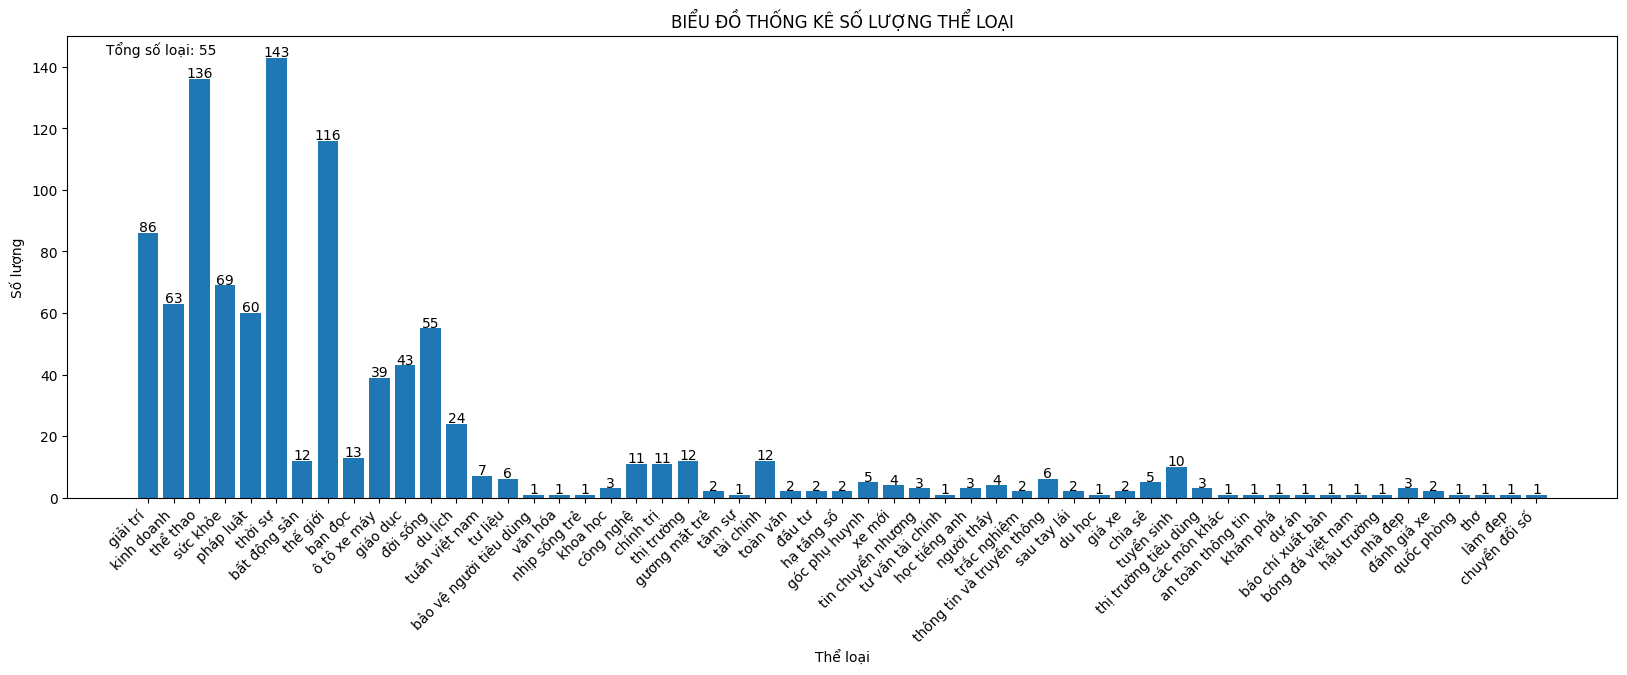

In [27]:
# Tạo từ điển để lưu trữ số lượng của mỗi thể loại
counts = {}
for item in data["Thể loại"]:
    if item in counts:
        counts[item] += 1
    else:
        counts[item] = 1

# Lấy danh sách các nhãn và giá trị
labels = list(counts.keys())
values = list(counts.values())

# Thiết lập kích thước hình ảnh
plt.figure(figsize=(20, 6))

# Tạo biểu đồ cột
plt.bar(counts.keys(), counts.values())

# Thêm số lượng lên đỉnh cột
for i, v in enumerate(counts.values()):
    plt.text(i, v+0.5, str(v), ha='center')

# Thêm chú thích
plt.text(0.5, max(counts.values())+1, f"Tổng số loại: {len(counts)}", ha='center')

# Thiết lập định dạng cho biểu đồ
plt.title("BIỂU ĐỒ THỐNG KÊ SỐ LƯỢNG THỂ LOẠI")
plt.xlabel("Thể loại")
plt.ylabel("Số lượng")
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()

XOÁ STOPWORD

In [28]:
def remove_stop_words(text):
    tmp = text.split(' ')
    for stop_word in stop_words:
        temp = stop_word.strip()
        for chu in tmp:
            if chu == temp: tmp.remove(chu)
    return " ".join(tmp)
with open('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/vietnamese-stopwords (1).txt', 'r', encoding='utf-8' ) as file:
    stop_words = file.readlines()

def TuDung (str):
  id = 0
  for e in data[str]:
    data[str][id]= remove_stop_words(data[str][id])
    id += 1
TuDung('Tiêu đề')   
#TuDung('Thể loại')
TuDung('Mô tả')
TuDung('Nội dung')
data.head(1000)

,Tiêu đề,Thể loại,Mô tả,Nội dung
0,đừng mẹ cáu bất ngờ tập,giải trí,đại diện vfc đừng mẹ cáu dừng tập 24 dự kiến b...,phim đừng mẹ cáu dần hồi kết đầu tỷ lệ truyền ...
1,ngành chăn nuôi toán quý i2023,kinh doanh,bất chấp thách thức ảnh hưởng chuỗi cung ứng t...,kỳ vọng tiếp tục trưởng 2023 liệu khăn đối doa...
2,bất ngờ hlv philippe troussier trở việt nam,thể thao,đề xuất mời hlv philippe troussier dắt tuyển v...,hlv park hang seo thông báo gia hạn hợp đồng 1...
3,vợ tiếp tục nsnd công lý nhật chữa bệnh,giải trí,trang cá nhân ngọc hà đăng ảnh chụp nhật xã ns...,việt 232 hà hôm hiệu thức dậy hà ơn tỉnh giấc ...
4,tiến sĩ bùi sỹ lợi giải tỏa máy móc đắp chiếu ...,sức khỏe,tiến sĩ lợi sai phạm máy móc sai tháo gỡ thiết...,tọa đàm ngành y 232 lãnh đạo bệnh viện tuyến c...
...,...,...,...,...
995,mu xong garnacho chelsea tóm gọn osimhen,tin chuyển nhượng,mu xong garnacho chelsea tóm gọn victor osimhe...,mu chân thành công garnacho garnacho gắn bó mu...
996,kết bóng đá hôm 72 bình định thắng to slna chia,thể thao,cập nhật kết bóng đá hôm 722023 giải bóng đá h...,trận đấu trực tiếp vleague 2023 vòng 2 0702 18...
997,niềm vui nỗi khổ đàn 12 vợ 102 578 cháu,thế giới,nổi tiếng gia đình ngỏ gả gái đàn 12 vợ 102 57...,musa hasahya kasera 68 102 đứa 578 đứa cháu th...
998,đọc ủng hộ hoàn cảnh khăn 10 12023,chia sẻ,10 12023 báo vietnamnet tiền 410617000 đồng gi...,1 ủng hộ ngân hàng vietcombank tiền thông ủng ...


In [29]:
# Lưu dataframe thành một file excel
data.to_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx', index=False)

THỐNG KÊ SỐ LƯỢNG STOPWORD

In [30]:
# Đếm số từ stopword
with open('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/vietnamese-stopwords (1).txt', 'r') as file:
    content = file.read()
    word_count = len(content.split())
    print(f"Số lượng từ trong file là {word_count}.")

Số lượng từ trong file là 3604.


NGỮ NGHĨA

In [31]:
rd = pd.read_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx')
dt = pd.DataFrame(rd, columns =['Tiêu đề', 'Thể loại', 'Mô tả', 'Nội dung'] )
Tieude = rd['Tiêu đề']
Theloai =rd['Thể loại']
Mota = rd['Mô tả']
Noidung = rd['Nội dung']

def ngunghia(str):
  ngunghia =[]
  for x in str:
    text = x
    word_segmented_text = underthesea.word_tokenize(text)
    ngunghia.append(word_segmented_text)
  print(ngunghia)
ngunghia(Tieude)
ngunghia(Theloai)
ngunghia(Mota)
#ngunghia(Noidung)



[['đừng', 'mẹ', 'cáu', 'bất ngờ', 'tập'], ['ngành', 'chăn nuôi', 'toán', 'quý', 'i2023'], ['bất ngờ', 'hlv', 'philippe', 'troussier', 'trở', 'việt', 'nam'], ['vợ', 'tiếp tục', 'nsnd', 'công lý', 'nhật', 'chữa', 'bệnh'], ['tiến sĩ', 'bùi', 'sỹ', 'lợi', 'giải tỏa', 'máy móc', 'đắp', 'chiếu', 'bệnh'], ['nữ', 'tphcm', 'thắng', 'đậm', 'cúp', 'quốc gia', '2023'], ['mẹ', 'bỏng', 'gái', 'tử vong', 'nướng', 'mực', 'cồn', 'sát khuẩn'], ['bắt', '2', 'đối tượng', 'vận', '31', 'kg', 'ma túy'], ['bao nhiêu', 'đăng kiểm', 'viên', 'khởi tố'], ['gửi', 'tiết kiệm', 'ngân hàng', 'kênh', 'đầu tư', 'hấp', 'đầu', '2023'], ['vụ', 'đâm chết', 'tình địch', 'nửa đêm', 'vợ', 'nạn nhân', 'báo', 'hung thủ'], ['chồng', 'cũ', 'nữ', 'lê giang', 'xế chiều', 'nợ nần', 'thờ'], ['công an', 'thông', 'vụ', 'phụ nữ', 'đạp', 'xe', 'ngược', 'chiều', 'đâm', 'ô tô', 'bão', 'tphcm'], ['xây dựng', 'đề xuất', 'huy động', '849500', 'tỷ', 'đồng', 'xây', '1 triệu', 'xã hội'], ['báo', 'mỹ', 'bắn', 'chết', 'hiện trường', 'vụ', 'xả', 's

CHUYỂN THÀNH VECTOR

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
rd = pd.read_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx')
dt = pd.DataFrame(rd, columns = ['Tiêu đề', 'Thể loại', 'Mô tả', 'Nội dung'])
Tieude = dt['Tiêu đề']
Theloai = dt['Thể loại']
Mota = dt['Mô tả']
Noidung = dt['Nội dung']
vectorizer = CountVectorizer()
def vector(str):
  a_vector = []
  for doc in str:
    vector = vectorizer.fit_transform([doc]).toarray()
    a_vector.append(vector)
  print(a_vector)
vector(Tieude)
vector(Theloai)
vector(Mota)
#vector(Noidung)


[array([[1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 2]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 2, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

rd = pd.read_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx')
dt = pd.DataFrame(rd, columns=['Tiêu đề', 'Thể loại', 'Mô tả', 'Nội dung'])
Tieude = data['Tiêu đề']
Theloai = data['Thể loại']
Mota = data['Mô tả']
Noidung = data['Nội dung']

vectorizer = CountVectorizer(binary=True)

def vector(str):
  vectorizer = CountVectorizer()
  vectorizer.fit(str)
  a_vector = []
  for doc in str:
    vector = vectorizer.transform([doc]).toarray()
    a_vector.append(vector)
  print(a_vector)

vector(Tieude)
vector(Theloai)
vector(Mota)
vector(Noidung)

[array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0,

TÌM KIẾM VÀ SO KHỚP

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Đọc dữ liệu từ file excel
df = pd.read_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx')

# Khởi tạo CountVectorizer
vectorizer = CountVectorizer()

# Chuyển đổi dữ liệu văn bản thành ma trận vector
X = vectorizer.fit_transform(df['Tiêu đề'])

#Nhập cụm từ tìm kiếm
query = input("Nhập từ cần tìm: ")

# Xoá số
query_non_num = re.sub('\d+', '', query)
#print(query_non_num)

# Xoá ký tự đặc biệt
qery_non_num_char = remove_special_characters_vn(query_non_num)
#print(qery_non_num_char)

#Chuyển thành chữ thường
query_lower = qery_non_num_char.lower()
#print(query_lower)

#Chuẩn hoá TV
if __name__ == '__main__':
    query_plus = chuan_hoa_dau_cau_tieng_viet(query_lower)
#print(query_plus)

#Xoá stopword
query_non_sw = remove_stop_words(query_plus)
q_vec = vectorizer.transform([query_plus])

# Tính độ tương đồng giữa cụm từ nhập vào và các đoạn văn bản
similarity_scores = cosine_similarity(X, q_vec)

# Tìm kiếm những đoạn văn bản có độ tương đồng cao nhất
top_matches = similarity_scores.flatten().argsort()[:-10:-1]

# In ra những đoạn văn bản tương ứng với các vị trí tìm được, kèm theo vector tương ứng
found_match = False
for i, match_idx in enumerate(top_matches):
    if similarity_scores[match_idx][0] == 0:
        break
    if not found_match:
        found_match = True
        print('Kết quả tìm được:',df.iloc[match_idx]['Tiêu đề'])    
        #print('Vector của cụm từ "{}":'.format(query),q_vec.toarray())
        #print('Vector:', X[match_idx].toarray())
        print('Độ tương đồng:', similarity_scores[match_idx][0])
        print('\n')
    else:
        break

Nhập từ cần tìm: đừng mẹ cáu bất ngờ tập
Kết quả tìm được: đừng mẹ cáu bất ngờ tập
Độ tương đồng: 1.0000000000000002




In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Đọc dữ liệu từ file Excel
rd = pd.read_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx')

# Tạo một DataFrame với cột 'Nội dung'
df = pd.DataFrame(rd, columns=['Tiêu đề'])

# Tạo một đối tượng TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(df['Tiêu đề'])

# Chuyển đổi dữ liệu thành ma trận tính năng TF-IDF
data = vectorizer.transform(df['Tiêu đề'])

# Chuyển đổi ma trận thưa thành ma trận dày đặc
data = data.toarray()

#Nhập cụm từ tìm kiếm
query = input("Nhập từ cần tìm: ")

# Xoá số
query_non_num = re.sub('\d+', '', query)
#print(query_non_num)

# Xoá ký tự đặc biệt
qery_non_num_char = remove_special_characters_vn(query_non_num)
#print(qery_non_num_char)

#Chuyển thành chữ thường
query_lower = qery_non_num_char.lower()
#print(query_lower)

#Chuẩn hoá TV
if __name__ == '__main__':
    query_plus = chuan_hoa_dau_cau_tieng_viet(query_lower)
#print(query_plus)

#Xoá stopword
query_non_sw = remove_stop_words(query_plus)

# Chuyển đổi cụm từ tìm kiếm thành đối tượng TfidfVectorizer
query_vector = vectorizer.transform([query_non_sw])

# Chuyển đổi ma trận thưa thành ma trận dày đặc
query_vector = query_vector.toarray()

# In hình dạng của vectơ truy vấn
print('hình dạng của vector truy vấn:', query_vector.shape)

from sklearn.metrics.pairwise import cosine_similarity

def search(query_vector, data):
    similarity_scores = cosine_similarity(query_vector, data)
    
    sorted_documents = sorted(range(len(similarity_scores[0])), key=lambda i: similarity_scores[0][i], reverse=True)
    
    results = set()
    for i in range(min(5, len(sorted_documents))):
        if similarity_scores[0][sorted_documents[i]] > 0 and df.iloc[sorted_documents[i]]['Tiêu đề'] not in results:
            print('Tiêu đề {}: vector: {}'.format(i+1, similarity_scores[0][sorted_documents[i]]))
            print(df.iloc[sorted_documents[i]]['Tiêu đề'])
            print('Tỉ lệ phần trăm tương đồng: {:.2f}%\n'.format(cosine_similarity(query_vector, data[sorted_documents[i]].reshape(1,-1))[0][0] * 100))
            results.add(df.iloc[sorted_documents[i]]['Tiêu đề'])
            if len(results) >= 5:
                break

search(query_vector, data)


Nhập từ cần tìm: đừng mẹ cáu bất ngờ tập
hình dạng của vector truy vấn: (1, 2147)
Tiêu đề 1: vector: 1.0000000000000002
đừng mẹ cáu bất ngờ tập
Tỉ lệ phần trăm tương đồng: 100.00%

Tiêu đề 2: vector: 0.5130874835779975
mẹ bé happi đừng mẹ cáu bao hạ giá
Tỉ lệ phần trăm tương đồng: 51.31%

Tiêu đề 3: vector: 0.4999988666825129
đừng mẹ cáu tập 22 happi phát hiện quan hệ hạnh
Tỉ lệ phần trăm tương đồng: 50.00%

Tiêu đề 4: vector: 0.37178171816057376
băn khoăn nhân vật happi già đời đừng mẹ cáu
Tỉ lệ phần trăm tương đồng: 37.18%

Tiêu đề 5: vector: 0.3312014652422347
đối lập thú vị quỳnh lương quỳnh kool đừng mẹ cáu
Tỉ lệ phần trăm tương đồng: 33.12%



In [36]:
df = pd.read_excel('../content/drive/MyDrive/Nhóm 5 - Cuối Kỳ/VietNamNet2Nhom5.xlsx')
data = df["Tiêu đề"]
# Tách các từ trong câu thành các token riêng lẻ
#tokens = [nltk.word_tokenize(sentence) for sentence in data]
tokens = [nltk.word_tokenize(sentence) for sentence in data]

# Chuyển đổi danh sách các token thành one-hot vector
mlb = MultiLabelBinarizer()
one_hot = mlb.fit_transform(tokens)

# Nhập cụm từ
#Nhập cụm từ tìm kiếm
query = input("Nhập từ cần tìm: ")

# Xoá số
query_non_num = re.sub('\d+', '', query)
#print(query_non_num)

# Xoá ký tự đặc biệt
qery_non_num_char = remove_special_characters_vn(query_non_num)
#print(qery_non_num_char)

#Chuyển thành chữ thường
query_lower = qery_non_num_char.lower()
#print(query_lower)

#Chuẩn hoá TV
if __name__=='__main__':
    query_plus = chuan_hoa_dau_cau_tieng_viet(query_lower)
#print(query_plus)

#Xoá stopword
query_non_sw = remove_stop_words(query_plus)

# Tách cụm từ thành các token riêng lẻ
query_tokens = nltk.word_tokenize(query_non_sw)

# Tìm kiếm khớp với one-hot vector
query_vector = mlb.transform([query_tokens])
matches = np.dot(one_hot, query_vector.T)
matching_indices = np.nonzero(matches)

# Xuất kết quả
'''
for i in range(len(matching_indices[0])):
    row = matching_indices[0][i]
    col = matching_indices[1][i]
    match_accuracy = matches[row][col] / len(query_tokens)
    print(f"Tìm thấy khớp ở vị trí {row} với độ chính xác {match_accuracy}")
'''
results = []
for i in range(matches.shape[0]):
    if matches[i] > 0:
        match_accuracy = int((matches[i] / len(query_tokens)) * 100)
        match_string = data[i]
        results.append({'title': match_string, 'accuracy': match_accuracy})

# Sắp xếp kết quả theo độ chính xác và chỉ in ra 5 kết quả đầu tiên
results = sorted(results, key=lambda x: x['accuracy'], reverse=True)
for i in range(min(5, len(results))):
    match_string = results[i]['title']
    match_accuracy = results[i]['accuracy']
    print(f"Tiều đề: {match_string} - Độ chính xác: {match_accuracy}%")
    print(30*'*')

Nhập từ cần tìm: đừng cáu mẹ bất ngờ
Tiều đề: đừng mẹ cáu bất ngờ tập - Độ chính xác: 100%
******************************
Tiều đề: băn khoăn nhân vật happi già đời đừng mẹ cáu - Độ chính xác: 60%
******************************
Tiều đề: đừng mẹ cáu tập 22 happi phát hiện quan hệ hạnh - Độ chính xác: 60%
******************************
Tiều đề: mẹ bé happi đừng mẹ cáu bao hạ giá - Độ chính xác: 60%
******************************
Tiều đề: đối lập thú vị quỳnh lương quỳnh kool đừng mẹ cáu - Độ chính xác: 60%
******************************
